## **PRASUNETHON HACKATHON**

### **Domain:** Machine Learning
#### **Title:** Predictive Maintenance for Industrial Equipment
#### **Problem Statement:** Develop a model predicting equipment failures to schedule maintenance and reduce downtime.


*k-Shoeb*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/predictive_maintenance_dataset.csv')

In [3]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
# shape of dataset
df.shape

(124494, 12)

In [5]:
# describe data
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
# check for null values
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

1

In [9]:
# delete duplicates
df = df.drop_duplicates()

# EDA

In [10]:
# unique counts
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [11]:
# convert date to datetime
df.date = pd.to_datetime(df.date)

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

df['days_active']=df.date-df.date[0]
df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,days_active,week_day
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,1,0 days,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,0 days,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,0 days,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,0 days,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,0 days,3


In [12]:
df.device.value_counts()

device
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: count, Length: 1169, dtype: int64

In [13]:
df["model"]=df["device"].apply(lambda x : x[:4])
df["model"].value_counts()

model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [14]:
df["other_device"]=df["device"].apply(lambda x : x[4:])
df["other_device"].value_counts()[:10]

other_device
QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
FP0C    304
GCED    304
GGPP    304
5X69    304
GPXY    304
Name: count, dtype: int64

In [15]:
# target uniue value count
df['failure'].value_counts()

failure
0    124387
1       106
Name: count, dtype: int64

<Axes: xlabel='failure', ylabel='count'>

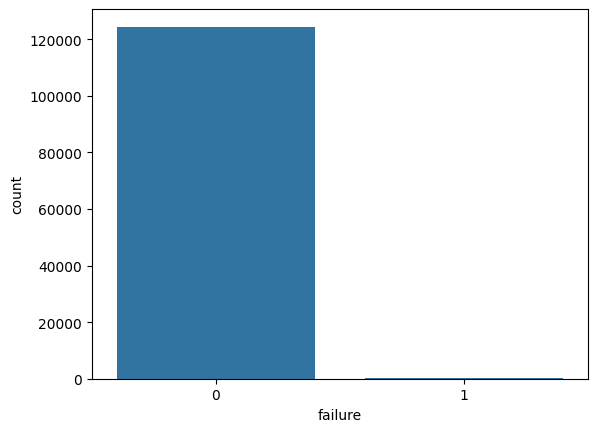

In [16]:
# countplot of failure
sns.countplot(x='failure', data = df)

In [17]:
# sorted unique values of metric1
df['metric1'].sort_values().head(100).unique()

array([     0,   2048,   2056,   2168,   3784,   4224,   4480,   4560,
         8280,   8616,   9088,   9472,  11480,  12776,  13824,  15928,
        17272,  18800,  19120,  23840,  26624,  28568,  30088,  35544,
        37680,  40208,  41000,  43016,  43888,  45088,  45216,  47288,
        47472,  47528,  48128,  48152,  48384,  49272,  49792,  50128,
        50584,  50696,  52664,  53184,  54040,  60192,  61208,  72808,
        75736,  76200,  78120,  79240,  89968,  90528,  95216,  96024,
        96264,  96272,  96968,  97848,  98736, 100920, 101640, 112376,
       112760, 123608, 124768, 125456, 127088, 127384, 132096, 132832,
       134568, 142720, 144368, 151600, 152520, 155968, 156120, 157792,
       163912, 167408, 172112, 172696, 172984, 176912, 177520, 178568,
       183192])

Values are multiple of 8

In [18]:
# check for number of values that are not devisible by 8
def multi(x,i):
    if x%i == 0:
        return True
    else:
        return False

a = df['metric1'].apply(lambda x: multi(x,8))
a[a == False].count()

46

In [19]:
df['metric1_divided'] = df['metric1']/8
df['metric1_divided'] = df['metric1_divided'].apply(lambda x: math.ceil(x))

In [20]:
# sorted unique values of metric2
df['metric2'].sort_values().unique()

array([    0,     8,    16,    24,    32,    40,    48,    55,    56,
          64,    72,    80,    88,    96,   104,   112,   120,   128,
         136,   144,   152,   160,   168,   176,   184,   192,   200,
         208,   216,   224,   232,   240,   248,   256,   264,   272,
         280,   288,   296,   304,   320,   328,   336,   344,   352,
         360,   368,   376,   384,   392,   400,   408,   416,   424,
         432,   440,   448,   456,   464,   472,   480,   488,   496,
         504,   512,   520,   528,   536,   544,   552,   560,   568,
         576,   584,   592,   600,   608,   616,   624,   632,   640,
         648,   656,   664,   672,   680,   704,   712,   728,   736,
         744,   752,   760,   776,   792,   800,   808,   816,   824,
         832,   840,   848,   864,   872,   888,   896,   912,   920,
         928,   936,   944,   952,   960,   968,   976,   984,   992,
        1000,  1024,  1032,  1040,  1048,  1056,  1064,  1072,  1080,
        1088,  1096,

Values of multiple of 8

In [21]:
a = df['metric1'].apply(lambda x: multi(x,8))
a[a == False].count()

46

In [22]:
df[df['metric2'] == 55].metric2.count()

1

In [23]:
idx = df['metric2'] == 55
df.loc[idx,'metric2'] = 56
df['metric2_divided'] = df['metric2']/8
df['metric2_divided'] = df['metric2_divided'].astype(int)

In [24]:
# sorted unique values of metric3
df['metric3'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     7,     8,     9,
          10,    11,    12,    14,    15,    16,    18,    21,    24,
          25,    34,    35,    36,    38,    53,    56,    61,    62,
          70,    72,   100,   107,   208,   220,   263,   266,   279,
         318,   323,   377,   378,   382,   406,  1162,  1326,  1331,
        2112,  2693, 24929])

metric3 doesnot have any pattern

In [25]:
df['metric4'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         34,   35,   36,   37,   38,   39,   40,   41,   43,   44,   45,
         46,   48,   49,   50,   51,   52,   53,   55,   56,   57,   58,
         60,   62,   65,   67,   69,   73,   74,   76,   79,   80,   86,
         90,   91,   94,   95,   97,  100,  108,  112,  118,  121,  122,
        128,  129,  135,  147,  160,  164,  173,  175,  186,  204,  214,
        215,  235,  236,  256,  288,  297,  299,  300,  305,  322,  331,
        399,  400,  401,  405,  406,  431,  486,  487,  521,  529,  533,
        763,  841, 1033, 1074, 1666])

metric4 doesnot have any pattern

In [26]:
df['metric5'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 78, 89, 90, 91, 92, 94, 95, 98])

metric5 doesnot have any pattern

In [27]:
df['metric6'].sort_values().unique()

array([     8,      9,     12, ..., 689035, 689062, 689161])

metric6 doesnot have any pattern

In [28]:
df['metric7'].sort_values().unique()

array([  0,   6,   8,  16,  22,  24,  32,  40,  48,  56,  72,  80,  96,
       104, 112, 128, 136, 152, 176, 216, 240, 272, 312, 424, 496, 736,
       744, 832])

metric7 is multiple of 2

In [29]:
df['metric7_divided'] = df['metric7']/2
df['metric7_divided'] = df['metric7_divided'].astype(int)

In [30]:
df['metric8'].sort_values().unique()

array([  0,   6,   8,  16,  22,  24,  32,  40,  48,  56,  72,  80,  96,
       104, 112, 128, 136, 152, 176, 216, 240, 272, 312, 424, 496, 736,
       744, 832])

looks similar to metric7

In [31]:
# check wheather metric7 vs metric8 are similar
df[df['metric7'] == df['metric8']].count()

date               124493
device             124493
failure            124493
metric1            124493
metric2            124493
metric3            124493
metric4            124493
metric5            124493
metric6            124493
metric7            124493
metric8            124493
metric9            124493
month              124493
days_active        124493
week_day           124493
model              124493
other_device       124493
metric1_divided    124493
metric2_divided    124493
metric7_divided    124493
dtype: int64

All the values of metric7 and metric8 are same

In [32]:
df['metric9'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    30,    33,
          34,    38,    41,    42,    51,    52,    57,    65,    70,
          98,   104,   120,   145,   155,   164,   170,   177,   205,
         222,   233,   241,   248,   255,   263,   269,   400,   898,
        1080,  1150,  1165,  1864,  2269,  2270,  2522,  2637,  2794,
        7226, 10137, 18701, 70000])

doesnot find any pattern

In [33]:
df.drop(['device', 'metric1','metric2','metric7','metric8'], axis = 1 , inplace = True)

In [34]:
df.columns

Index(['date', 'failure', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric9', 'month', 'days_active', 'week_day', 'model', 'other_device',
       'metric1_divided', 'metric2_divided', 'metric7_divided'],
      dtype='object')

In [35]:
# list of numeric columns
numeric_cols = ['metric3', 'metric4', 'metric5', 'metric6', 'metric9', 'metric1_divided', 'metric2_divided', 'metric7_divided', 'days_active']
numeric_cols

['metric3',
 'metric4',
 'metric5',
 'metric6',
 'metric9',
 'metric1_divided',
 'metric2_divided',
 'metric7_divided',
 'days_active']

In [37]:
# convert days_active to intiger
df['days_active'] = df['days_active'].dt.days

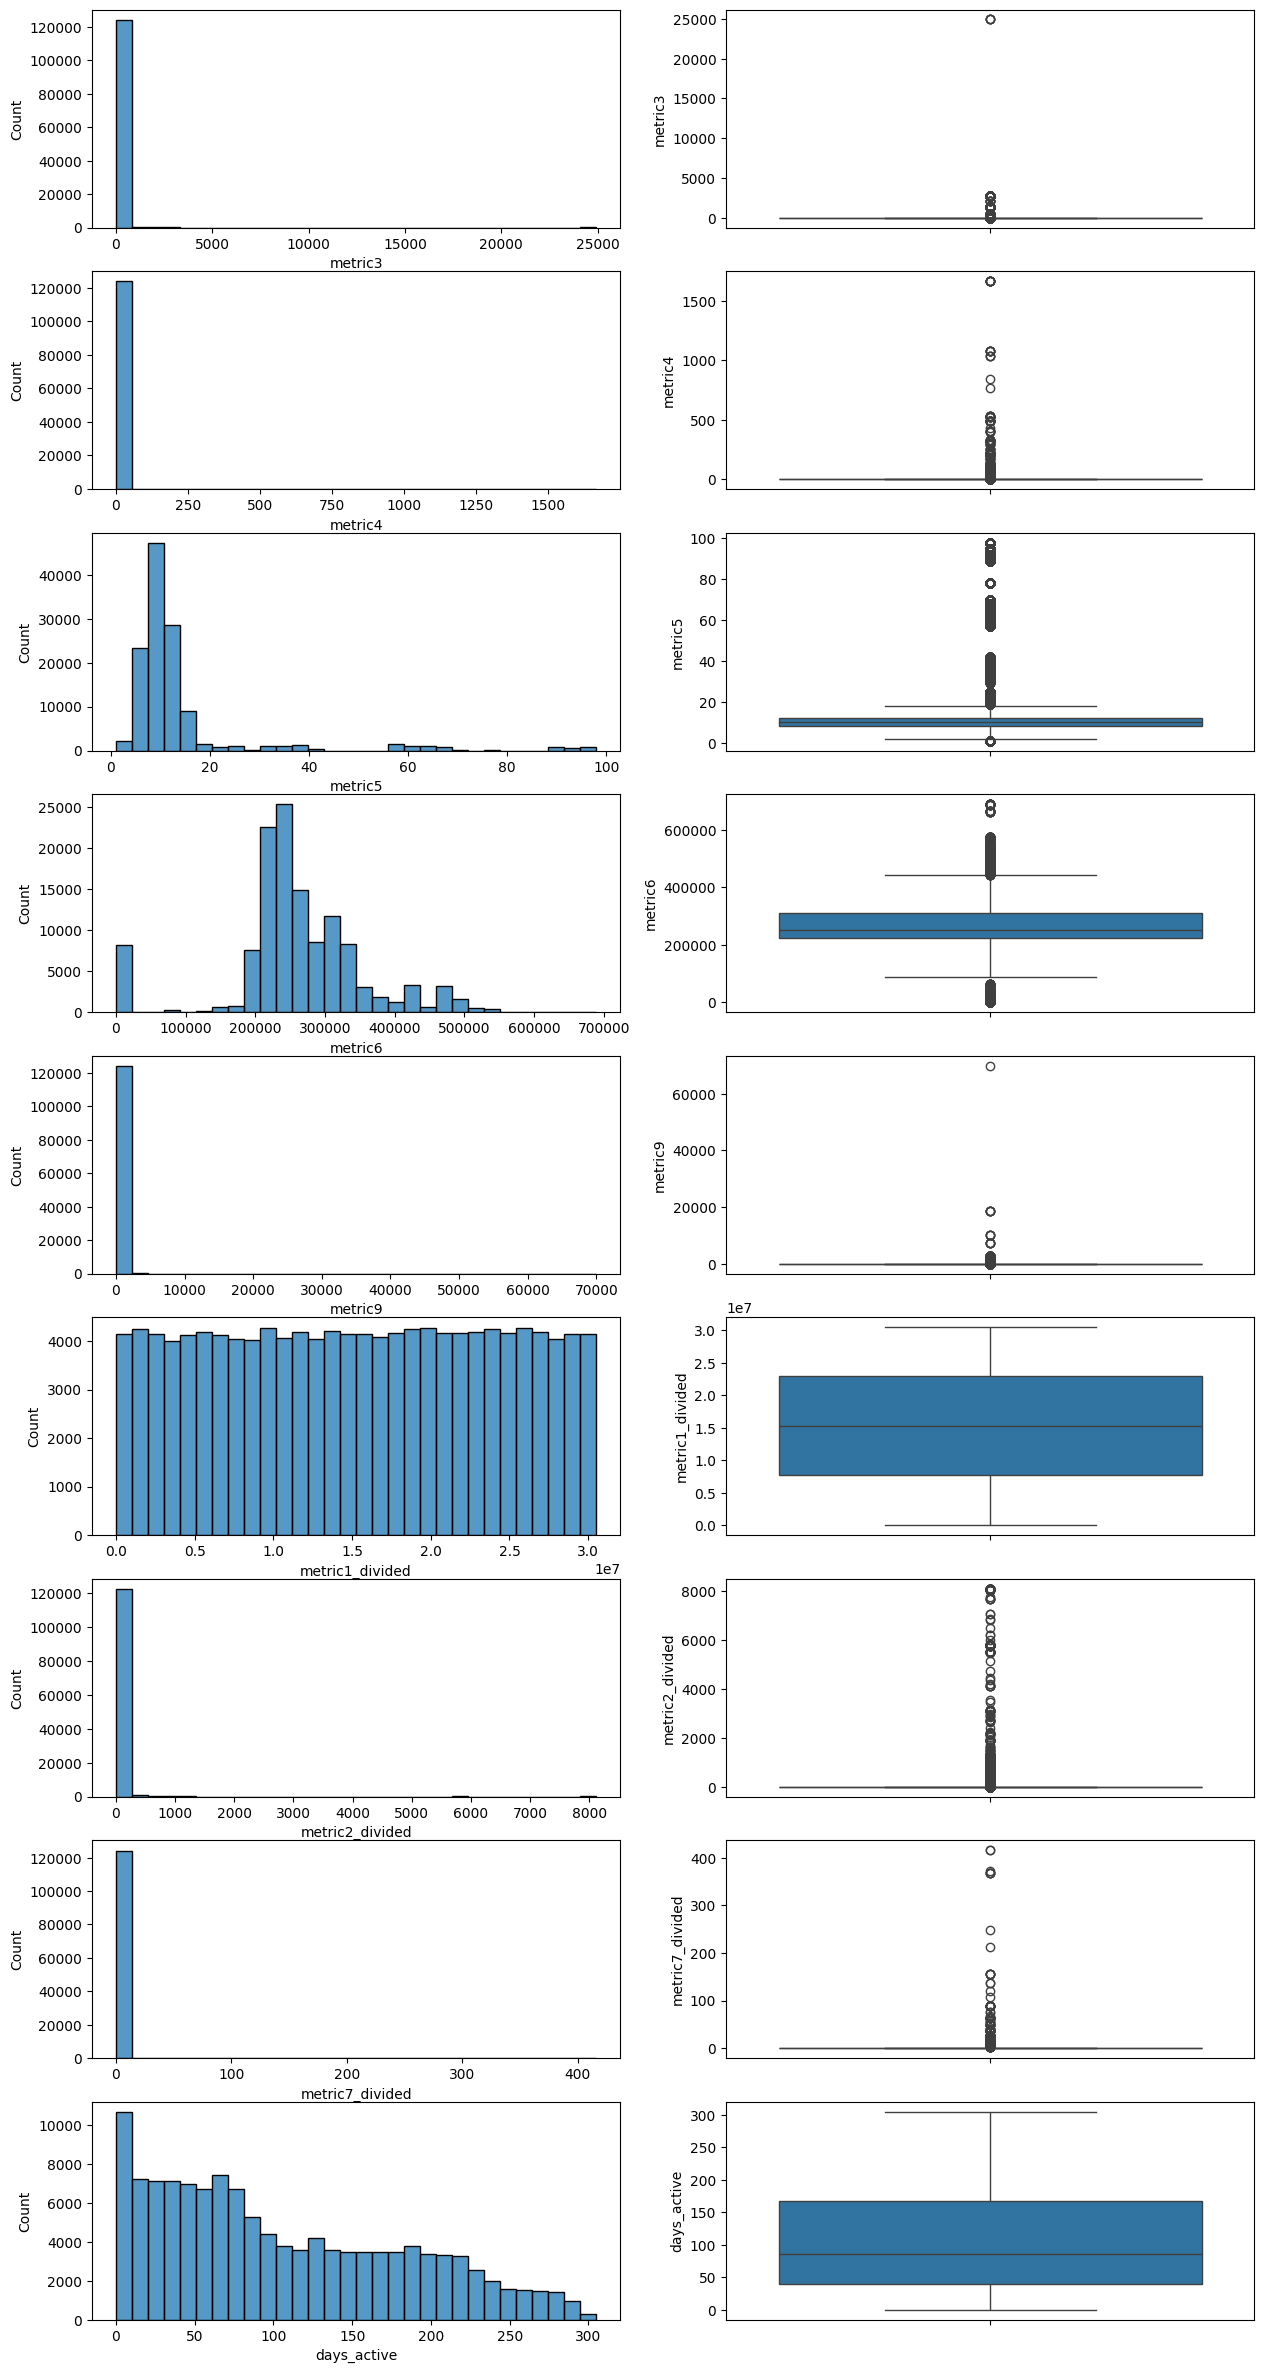

In [38]:
# histogram and boxplot of numerical columns
figs, axs = plt.subplots(nrows = len(numeric_cols),ncols = 2,figsize=(15,30))
for i in range(0,len(numeric_cols)):

    sns.histplot(data = df, x = numeric_cols[i], bins = 30, ax = axs[i,0])
    sns.boxplot(data = df, y = numeric_cols[i], ax = axs[i,1])

Distribution for failure is 0


<Figure size 2000x1000 with 0 Axes>

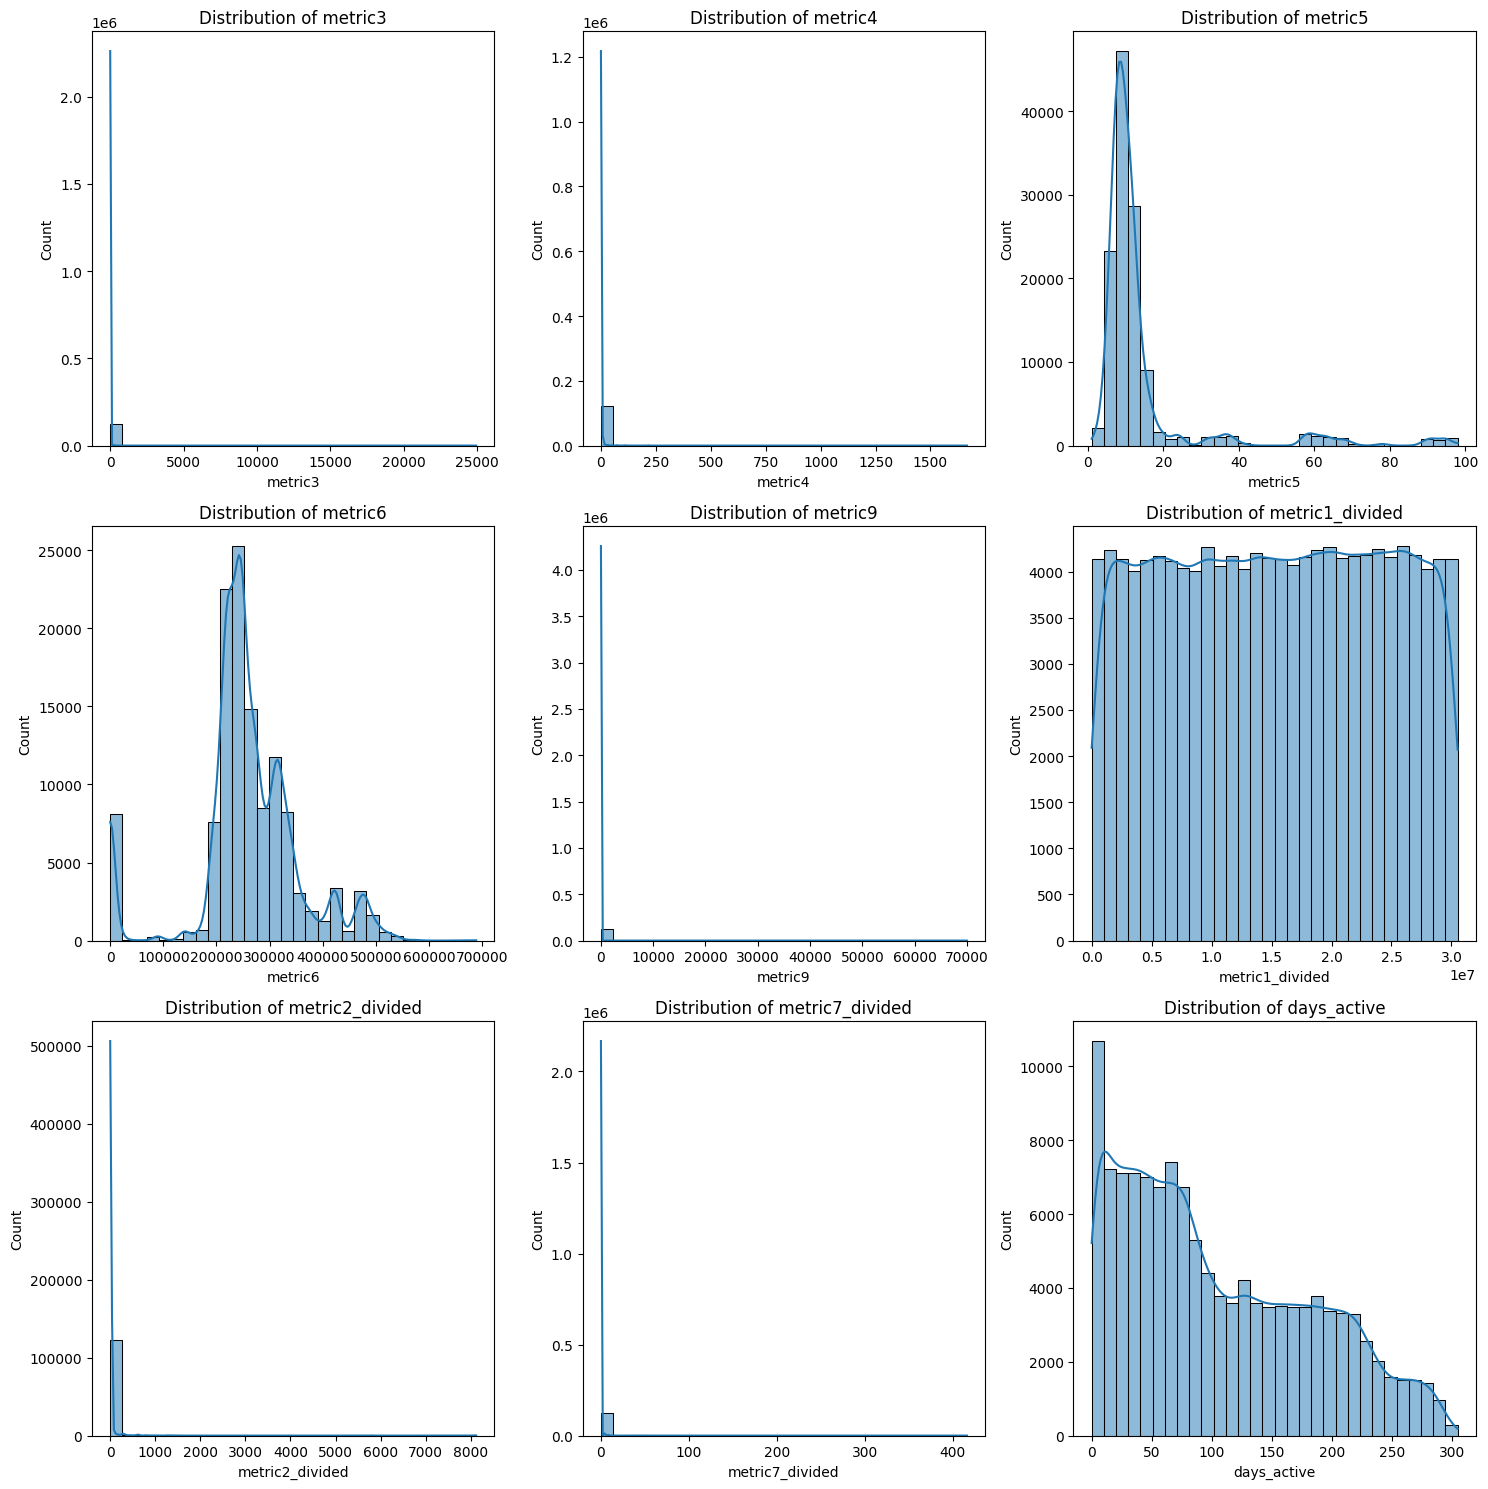

In [41]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(20, 10))
print("Distribution for failure is 0")
mask = df.failure==0

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df.loc[mask], x=col, bins = 30, kde=True)
    #sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Distribution for failure is 1


<Figure size 2000x1000 with 0 Axes>

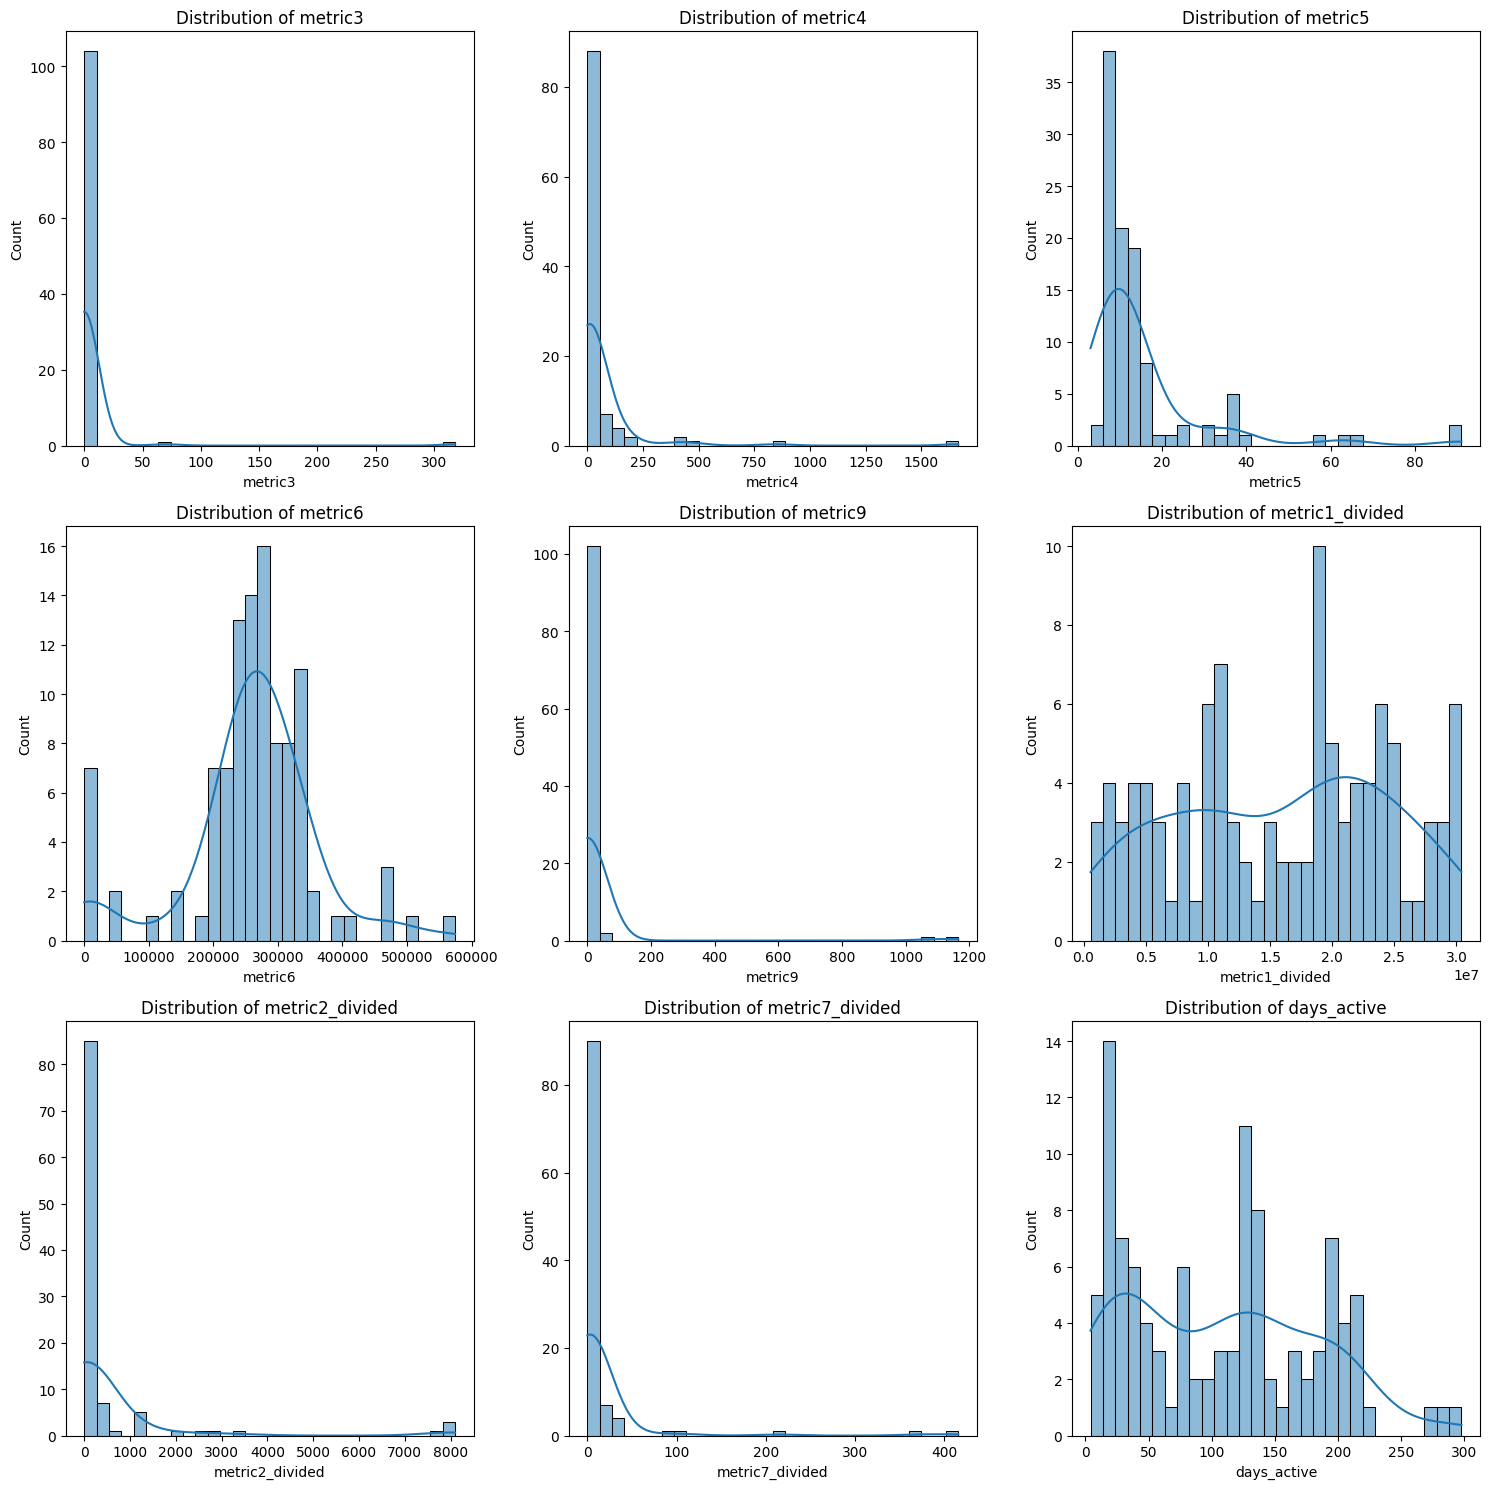

In [42]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(20, 10))
print("Distribution for failure is 1")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

mask= df.failure > 0
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    #sns.histplot(data=df.loc[mask], x=col, kde=True)
    sns.histplot(data=df.loc[mask], x=col, bins = 30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [43]:
# Separate data by transaction time
fraudulent = df[df["failure"] == 1]["metric1_divided"]
non_fraudulent = df[df["failure"] == 0]["metric1_divided"]

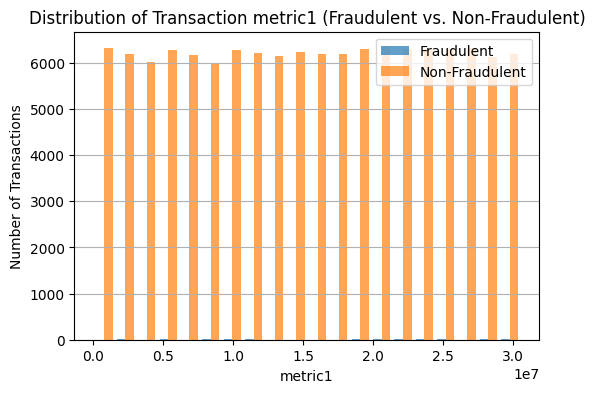

In [44]:
# Create the distribution plot
plt.figure(figsize=(6, 4))
plt.hist([fraudulent, non_fraudulent], label=["Fraudulent", "Non-Fraudulent"], bins=20, alpha=0.7)
plt.xlabel("metric1")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transaction metric1 (Fraudulent vs. Non-Fraudulent)")
plt.legend()
plt.grid(axis="y")
plt.show()

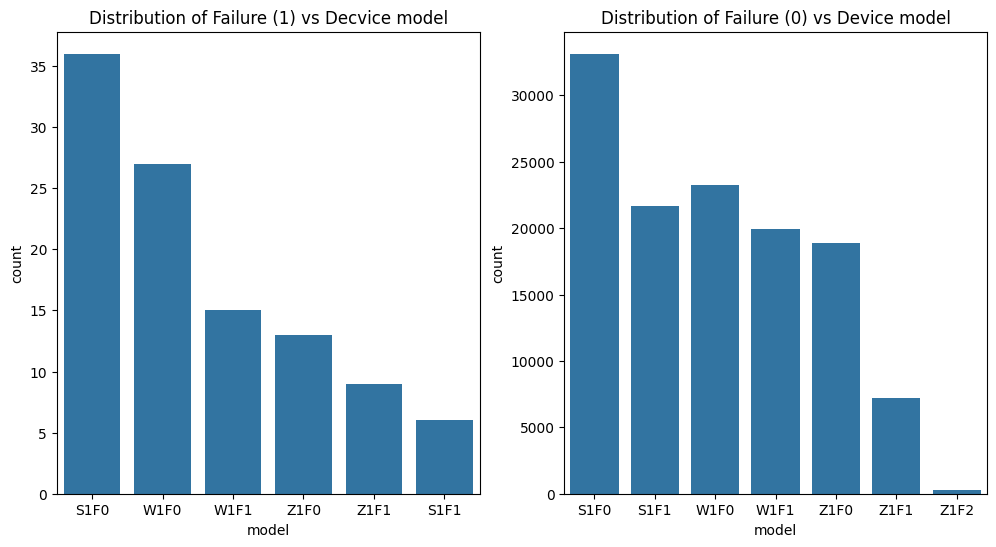

In [45]:
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="model", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (1) vs Decvice model')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="model", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (0) vs Device model')

plt.show()

In [46]:
# droping the Z1F2 as it is not in the failure
df.drop(df.loc[df["model"]=="Z1F2"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

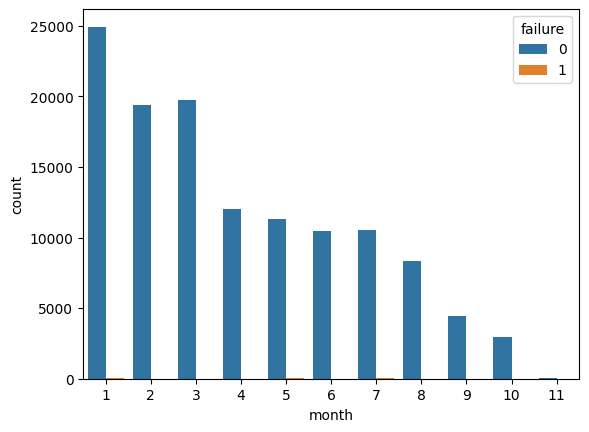

In [47]:
# count plot of month wise faluire
ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

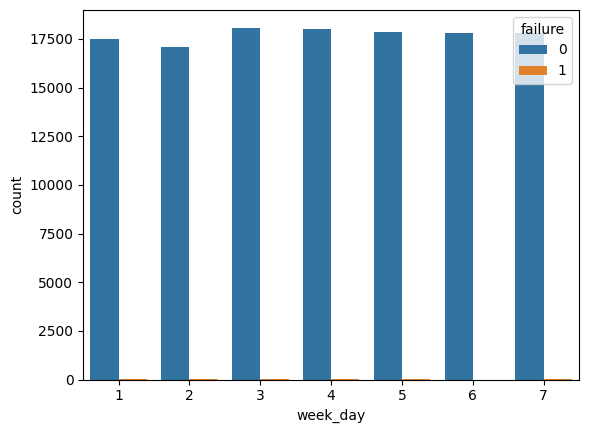

In [48]:
# countplot of day wise failure
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

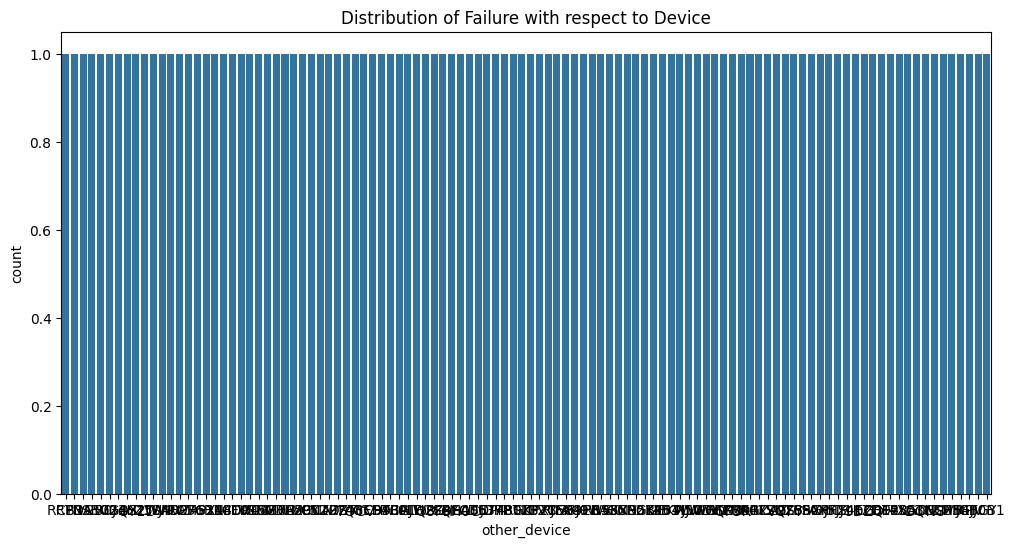

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x="other_device", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure with respect to Device')
plt.show()

In [50]:
# drop other device column
df.drop(['other_device', 'date'],axis=1,inplace=True)
df.sample(5)

,failure,metric3,metric4,metric5,metric6,metric9,month,days_active,week_day,model,metric1_divided,metric2_divided,metric7_divided
83388,0,0,0,8,210491,0,5,139,2,S1F1,25290701,0,0
44178,0,2,0,12,249774,5,2,58,5,W1F1,22217452,0,0
21417,0,0,0,5,256368,0,1,26,1,S1F0,5797241,0,0
56441,0,1,0,5,255374,8,3,76,2,Z1F1,17396201,0,0
120539,0,0,0,12,537090,0,9,268,5,S1F0,17138267,0,0


Text(0.5, 1.0, 'Failure over Time by Month')

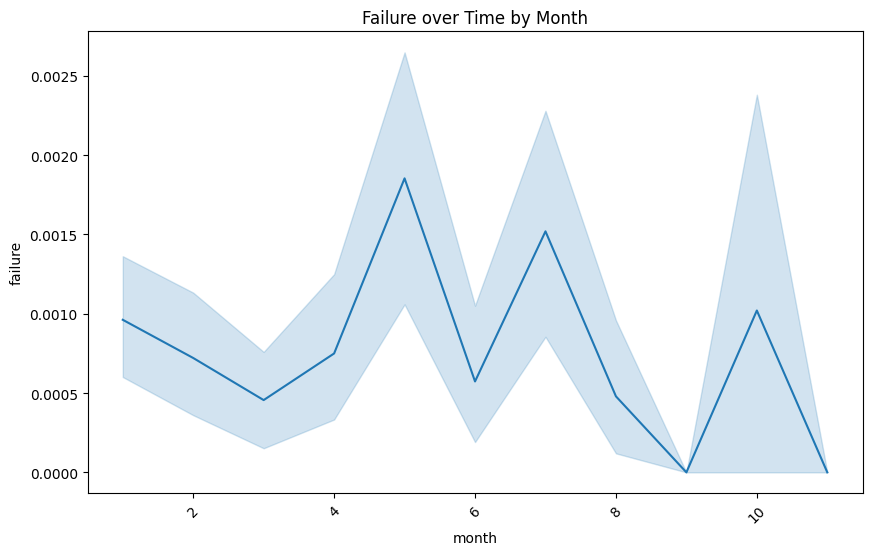

In [51]:
# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

In [52]:
# Column names
columns = df.columns.tolist()

Text(0.5, 1.0, 'Correlation Matrix')

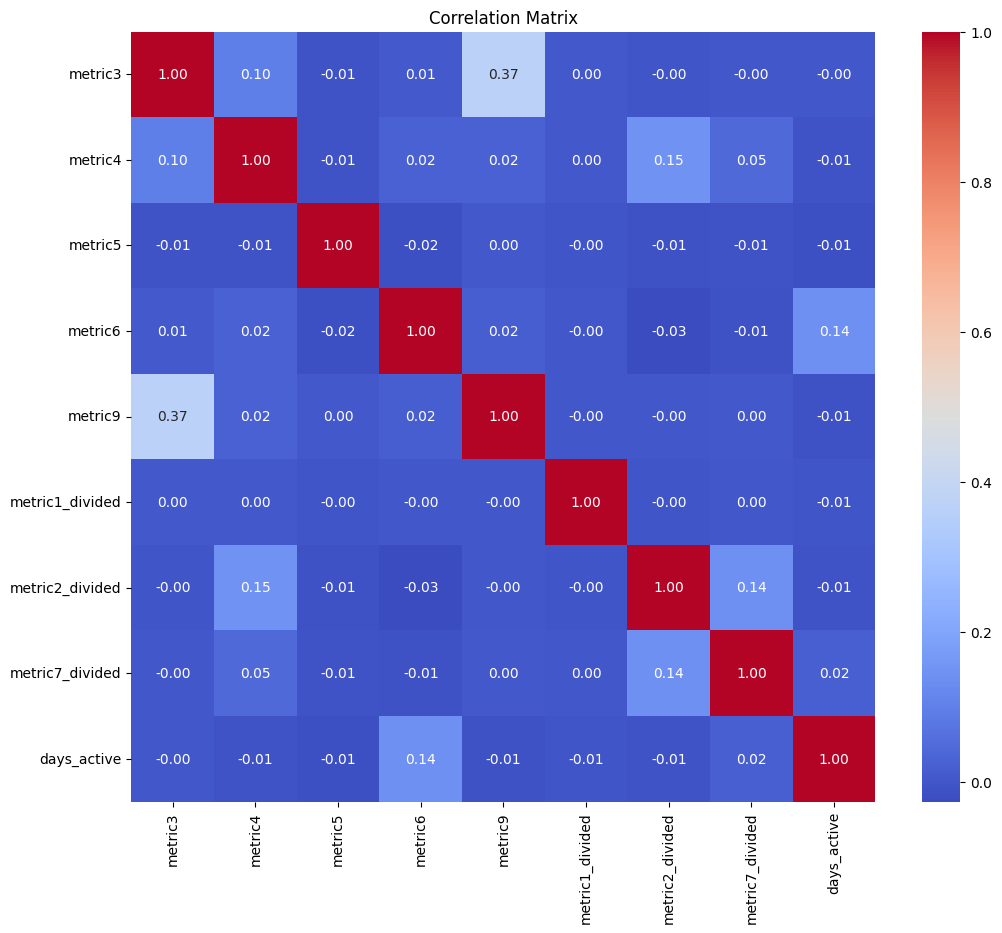

In [53]:
# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

In [54]:
# categorical columns
categorical_cols = ['model', 'week_day', 'month']
categorical_cols

['model', 'week_day', 'month']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   failure          124242 non-null  int64 
 1   metric3          124242 non-null  int64 
 2   metric4          124242 non-null  int64 
 3   metric5          124242 non-null  int64 
 4   metric6          124242 non-null  int64 
 5   metric9          124242 non-null  int64 
 6   month            124242 non-null  int32 
 7   days_active      124242 non-null  int64 
 8   week_day         124242 non-null  int32 
 9   model            124242 non-null  object
 10  metric1_divided  124242 non-null  int64 
 11  metric2_divided  124242 non-null  int64 
 12  metric7_divided  124242 non-null  int64 
dtypes: int32(2), int64(10), object(1)
memory usage: 11.4+ MB


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from imblearn.under_sampling import RandomUnderSampler

In [57]:
# Split data into features and target
X = df.drop('failure', axis=1)
y = df['failure']

In [58]:
# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_sampled, y_sampled = rus.fit_resample(X, y)

In [59]:
# shape of random saples
print(X_sampled.shape)
print(y_sampled.shape)

(212, 12)
(212,)


In [61]:
# Define your class weights as a dictionary
#class_weights = {0: 1, 1: 20}

In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

In [63]:
# Preprossesing pippeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [68]:
# Models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(solver='adam', alpha=0.001)
}

In [69]:
# training and evaluation pipeline

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)

    # Prediction on test data
    y_pred = pipeline.predict(X_test)

    # Probabilities for positive class for binary classification
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate model
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    # Print ROC AUC
    print(f'{name} ROC AUC: {roc_auc:.4f}')
    print('-' * 50)
    print()

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    # Calculate AUPRC
    auprc = auc(recall, precision)
    # Print AUPRC
    print(f'{name} AUPRC: {auprc:.4f}')
    print('-' * 50)
    print()

    # Generate classification report
    report = classification_report(y_test, y_pred)
    # Print classification report
    print(report)
    print('-' * 50)
    print()

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Print confusion matrix
    print(cm)
    print('-' * 50)
    print()

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')
    print('-' * 50)
    print()
    print()

KNN ROC AUC: 0.6906
--------------------------------------------------

KNN AUPRC: 0.7293
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        33
           1       0.59      0.71      0.65        31

    accuracy                           0.62        64
   macro avg       0.63      0.63      0.62        64
weighted avg       0.63      0.62      0.62        64

--------------------------------------------------

[[18 15]
 [ 9 22]]
--------------------------------------------------

KNN Cross-Validation Accuracy: 0.51 ± 0.11
--------------------------------------------------


SVM ROC AUC: 0.7141
--------------------------------------------------

SVM AUPRC: 0.7166
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        33
           1       0.59      0.74      0.66        31

    ac

## Best Model

Based on these metrics, Random Forest appears to be the best model overall. It has the highest ROC AUC (0.9120), the highest AUPRC (0.9104), high accuracy (0.83), and high cross-validation accuracy (0.82 ± 0.04).


## Random Forest Metrics:

Random Forest ROC AUC: 0.9120

Random Forest AUPRC: 0.9104

--------------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.83      0.81      0.82        31

    accuracy                           0.83        64
    macro avg      0.83      0.83      0.83        64
    weighted avg   0.83      0.83      0.83        64

--------------------------------------------------
Confusion matrix:

[[28  5]

 [ 6 25]]

--------------------------------------------------

Random Forest Cross-Validation Accuracy: 0.82 ± 0.04

--------------------------------------------------